<a href="https://colab.research.google.com/github/aldarion-git/ejemplos-y-pruebas/blob/main/Ejemplo_de_uso_de_Pytrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

In [47]:
import pandas as pd
from pytrends.request import TrendReq
import seaborn as sns
import matplotlib.pyplot as plt

Creamos la lista de términos e invocamos la función con la que obtendremos el listado de popularidad de cada término por fecha.

In [48]:
term_list = ['bota','zapato','mocasin','running','sandalia']

In [49]:
pytrends = TrendReq(hl="es") # hl es el idioma con el que nos conectamos a GT
pytrends.build_payload(kw_list=term_list, cat=697, timeframe='today 12-m', geo='ES') # cat = https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

In [52]:
df = pytrends.interest_over_time()

df['country'] = 'ES'
df = df.sort_values(by='date', ascending=False).reset_index().drop('isPartial', axis=1) # limpiamos un poco
df

,date,bota,zapato,mocasin,running,sandalia,country
0,2022-12-18,46,32,4,0,14,ES
1,2022-12-11,50,35,5,6,6,ES
2,2022-12-04,50,32,3,6,6,ES
3,2022-11-27,49,30,1,8,4,ES
4,2022-11-20,53,35,4,14,7,ES
5,2022-11-13,49,38,8,9,7,ES
6,2022-11-06,39,35,6,5,5,ES
7,2022-10-30,40,40,8,8,5,ES
8,2022-10-23,37,38,6,9,7,ES
9,2022-10-16,31,39,7,10,8,ES


In [53]:
df.dtypes

date        datetime64[ns]
bota                 int64
zapato               int64
mocasin              int64
running              int64
sandalia             int64
country             object
dtype: object

Pintamos el dataframe de Google Trends utilizando las funciones de plot de Pandas.

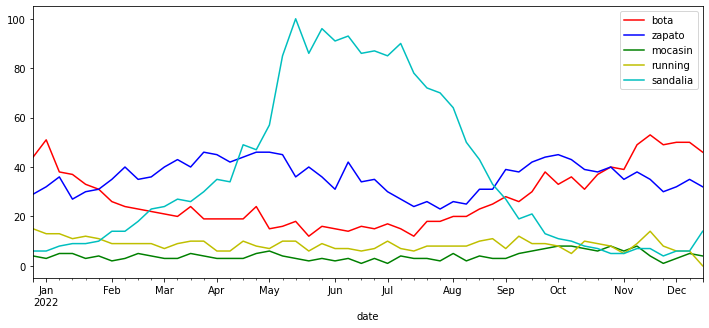

In [54]:
color = ['r','b','g','y','c']
df.plot(figsize=(12, 5), x='date', y=term_list, color=color)

O bien reformateamos el dataframe para utilizar Seaborn, que me gusta más ;)

In [55]:
df = df.melt(id_vars=['date','country'], 
        var_name='term', 
        value_name="popularity").sort_values(by='date', ascending=False).reset_index(drop=True)
df

,date,country,term,popularity
0,2022-12-18,ES,bota,46
1,2022-12-18,ES,mocasin,4
2,2022-12-18,ES,sandalia,14
3,2022-12-18,ES,running,0
4,2022-12-18,ES,zapato,32
...,...,...,...,...
255,2021-12-26,ES,running,15
256,2021-12-26,ES,bota,44
257,2021-12-26,ES,zapato,29
258,2021-12-26,ES,mocasin,4


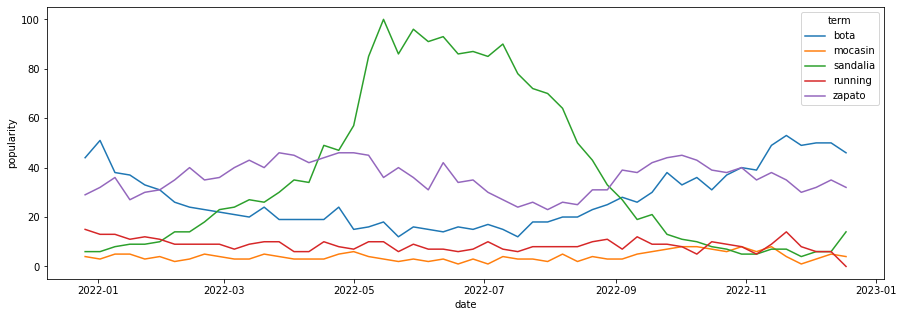

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
sns.lineplot(data=df, x='date', y='popularity', hue='term', ax=ax)

Y aquí os dejo el resto de funciones que pueden ser interesantes para un análisis.

In [13]:
pytrends.related_queries()

{'bota': {'top':                   query  value
  0            bota mujer    100
  1             nike bota     57
  2               la bota     48
  3           bota hombre     41
  4             vans bota     36
  5        air force bota     33
  6           bota cowboy     30
  7            bota negra     29
  8             bota vino     25
  9      air force 1 bota     24
  10         bota de vino     22
  11            bota alta     21
  12          adidas bota     19
  13        nike air bota     18
  14        converse bota     17
  15  nike air force bota     15
  16         nike de bota     14
  17          bota blanca     13
  18         bota militar     13
  19       bota de futbol     12
  20           bota tacon     12
  21      nike bota mujer     12
  22         bota campera     11
  23    bota negra cowboy      5
  24      bota negra alta      4, 'rising':                  query  value
  0    bota negra cowboy    110
  1  bota chelsea hombre     90
  2  bota skechers muj

In [ ]:
pytrends.suggestions('zapato')

In [ ]:
pytrends.categories()

In [ ]:
pytrends.interest_by_region(resolution="ES")

Para más info de la librería: https://pypi.org/project/pytrends/